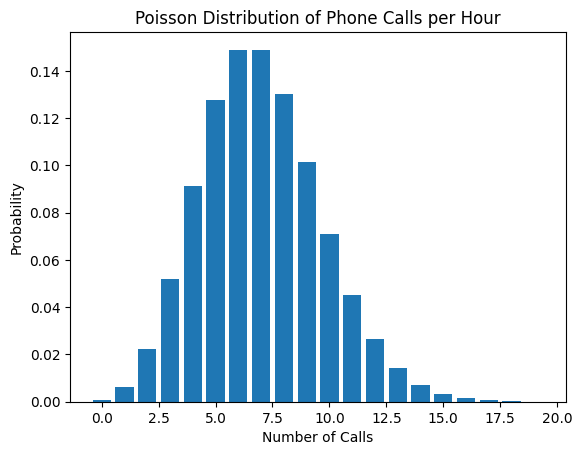

Probability of receiving exactly 7 calls: 0.14900277967433773
Probability of receiving more than 7 calls: 0.4012861644769632


In [1]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

# parameters
lambda_ = 7 # average number of calls per hour

# range of possible number of calls
k_values = np.arange(0, 20)

# calculate PMF for each k
pmf_values = poisson.pmf(k_values, lambda_)

# plot
plt.bar(k_values, pmf_values)
plt.title('Poisson Distribution of Phone Calls per Hour')
plt.xlabel('Number of Calls')
plt.ylabel('Probability')
plt.show()

# calculate the probability of receiving exactly 7 calls
p_7 = poisson.pmf(7, lambda_)
print('Probability of receiving exactly 7 calls:', p_7)

# calculate the probability of receiving more than 7 calls
p_more_than_7 = 1 - poisson.cdf(7, lambda_)
print('Probability of receiving more than 7 calls:', p_more_than_7)


In [2]:
# In any 15-minute interval, there is a 20% probability that you will see at least one shooting star. What is the proba- bility that you see at least one shooting star in the period of an hour?

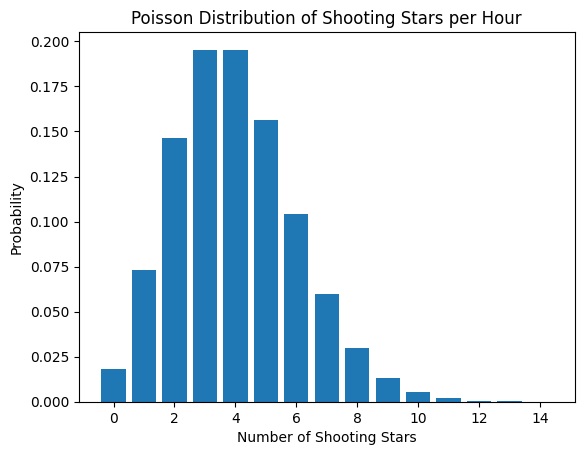

Probability of seeing exactly 4 shooting stars: 0.19536681481316454
Probability of seeing more than 4 shooting stars: 0.37116306482012673


In [3]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

# parameters
lambda_ = 4 # average number of shooting stars per hour

# range of possible number of calls
k_values = np.arange(0, 15)

# calculate PMF for each k
pmf_values = poisson.pmf(k_values, lambda_)

# plot
plt.bar(k_values, pmf_values)
plt.title('Poisson Distribution of Shooting Stars per Hour')
plt.xlabel('Number of Shooting Stars')
plt.ylabel('Probability')
plt.show()

# calculate the probability of seeing exactly 4 shooting stars
p_4 = poisson.pmf(4, lambda_)
print('Probability of seeing exactly 4 shooting stars:', p_4)

# calculate the probability of seeing more than 4 shooting stars
p_more_than_4 = 1 - poisson.cdf(4, lambda_)
print('Probability of seeing more than 4 shooting stars:', p_more_than_4)

In [4]:
# in the case of calculating the probability of seeing at least 1 shooting stars, it's equivalent to calculate 1-pmf(0) or 1-pdf(0)


from scipy.stats import poisson

# parameters
lambda_ = 4 * 0.2 # mean number of successes in an hour

# probability of seeing no shooting stars in an hour
p_0 = poisson.pmf(0, lambda_) # or poisson.cdf(0, lambda_)

# probability of seeing at least one shooting star in an hour
p_at_least_one = 1 - p_0 

print('Probability of seeing at least one shooting star in an hour:', p_at_least_one)




Probability of seeing at least one shooting star in an hour: 0.5506710358827784


In [5]:
# the above problem is better solved using the binomial distribution

# The difference in the probabilities calculated using the binomial and Poisson distributions is due to the approximation used in the Poisson distribution.

# The Poisson distribution is an approximation of the binomial distribution that is used when the number of trials is large and the probability of success is small. In this case, we’re approximating the binomial distribution (with n_trials=4 and p_success=0.2) with a Poisson distribution with lambda = n_trials * p_success = 0.8.

# However, this approximation is not perfect, and the Poisson distribution tends to underestimate the probability for small values of lambda, which is why you’re seeing a slightly lower probability with the Poisson distribution.

# It’s also worth noting that the binomial distribution is the exact distribution for this scenario (since we have a fixed number of trials and a fixed probability of success), while the Poisson distribution is an approximation that is used for computational convenience in certain scenarios. So the binomial distribution should give the more accurate result in this case.

In [6]:
# approximating multinomial distribution to a binomial case (generic case)

def binom_from_multinom(n_trials, p_extract, display=True, max_plots=999999999999):
    
    n_plots=0
    max_plots=min(max_plots,n_trials)
    
    PMF_all_counts = []
    inv_CDF_all_counts = []
    
    x = [_ for _ in range(1, n_trials+1)]
    
    for x_counts in range(1, n_trials+1):
        PMF_all_counts.append([0 for _ in range(x_counts-1)]+
                              [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) / 
                               (np.math.factorial(x_counts) * np.math.factorial(i-x_counts)) 
                               for i in range(x_counts, n_trials+1)])
    
        if (display and n_plots<max_plots):
            plt.bar(x, PMF_all_counts[x_counts-1])
            plt.title(f'PMF for exactly {x_counts} successes')
            plt.xlabel('Number of Trials')
            plt.ylabel('Exact probability')
            plt.show()
            n_plots+=1
     
    n_plots=0
    for i in range(n_trials):
        
        inv_CDF_all_counts.append(np.sum(PMF_all_counts[i:n_trials], axis=0))
    
        if (display and n_plots<max_plots):    
            plt.bar(x, inv_CDF_all_counts[i], color='g')
            plt.title(f'inv_CDF for at least {i+1} successes')
            plt.xlabel('Number of Trials')
            plt.ylabel('Cumulative probability')
            plt.show()
            n_plots+=1
        
    return PMF_all_counts, inv_CDF_all_counts


C:\Users\Alienware\AppData\Local\Temp\ipykernel_23920\3148302928.py:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  [np.math.factorial(i) * (p_extract**x_counts) * ((1-p_extract)**(i-x_counts)) /
C:\Users\Alienware\AppData\Local\Temp\ipykernel_23920\3148302928.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.math.factorial(x_counts) * np.math.factorial(i-x_counts))


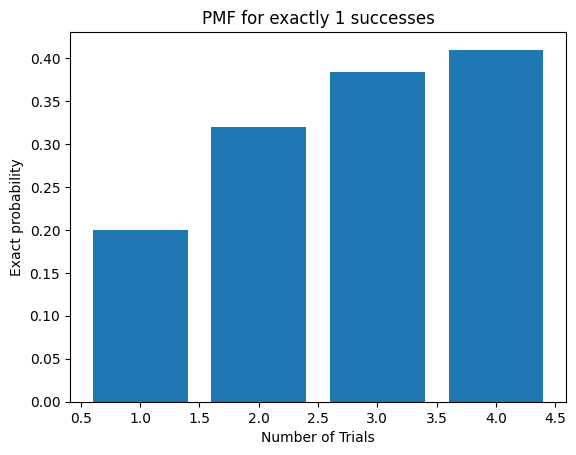

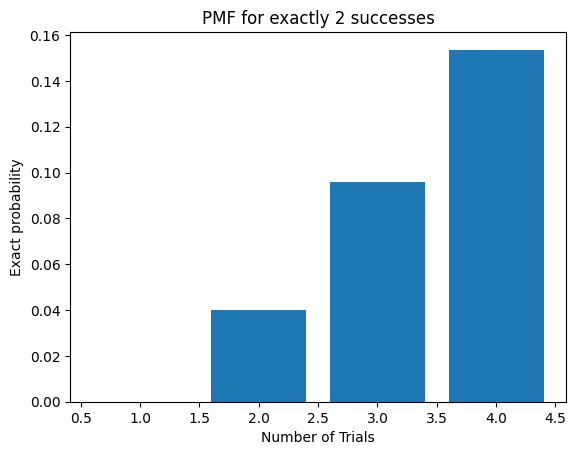

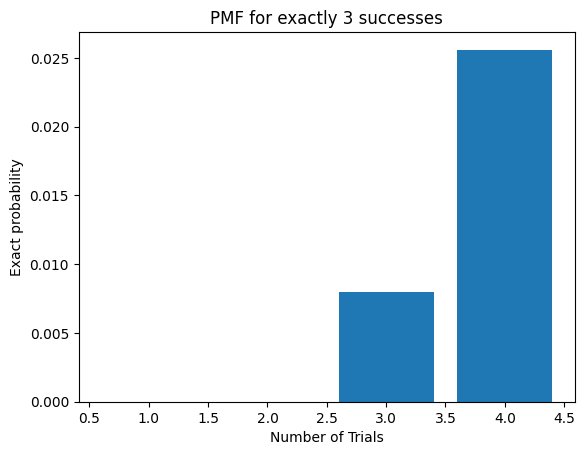

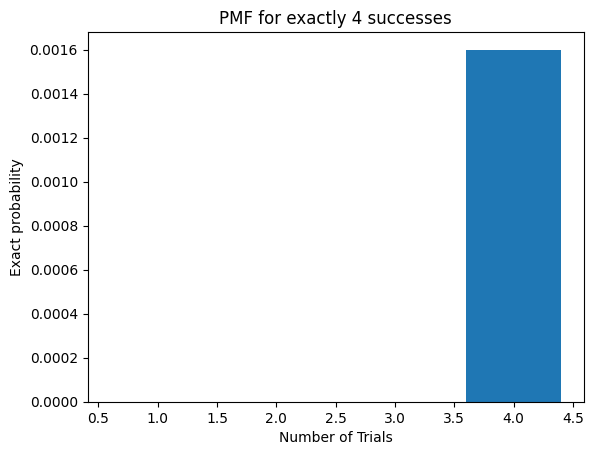

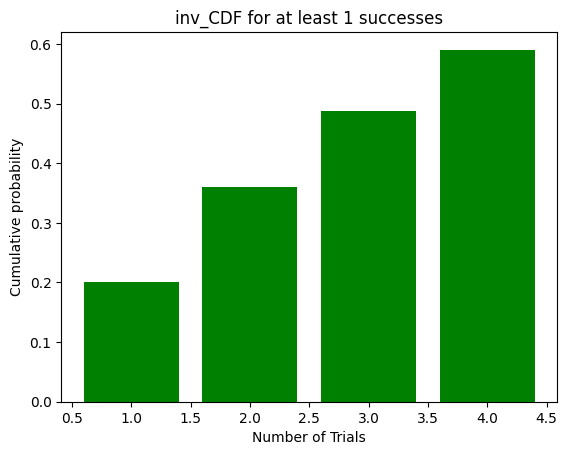

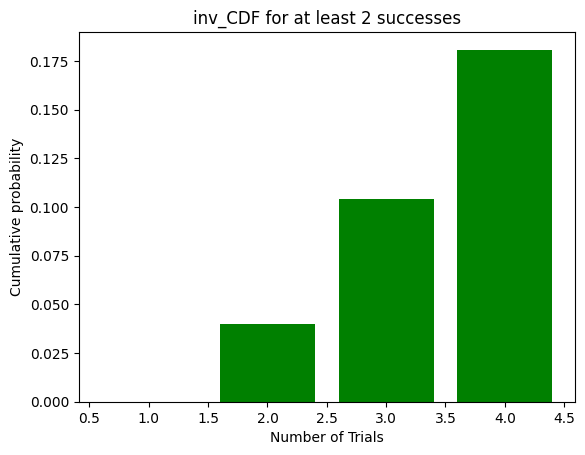

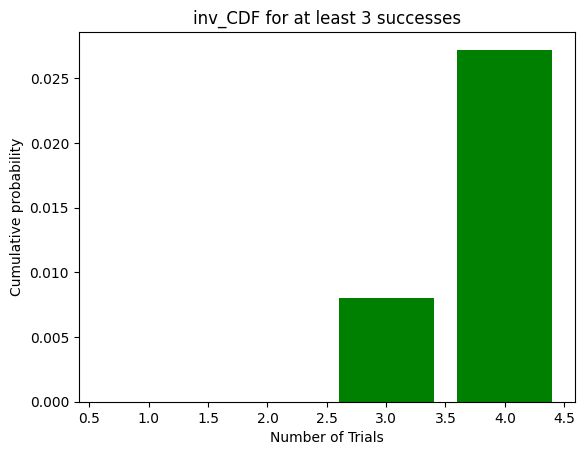

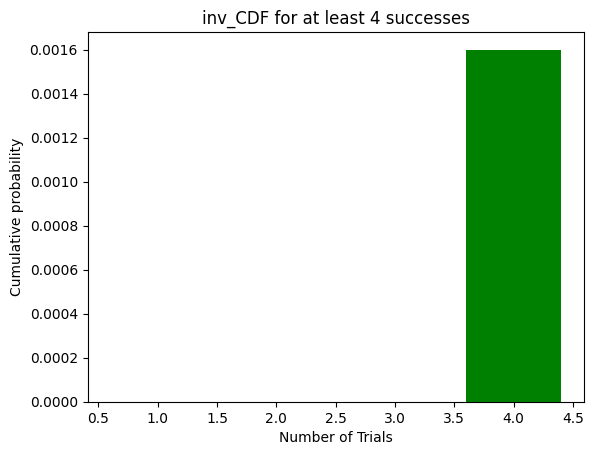

PMF 0.4096000000000002
inv_CDF 0.5904000000000003
p_manual 0.5903999999999998


In [7]:
# In any 15-minute interval, there is a 20% probability that you will see at least one shooting star. What is the proba- bility that you see at least one shooting star in the period of an hour?

num_quarters = 4 # four quarters of a hour in a hour
prob_shoot = 0.2 # prob of shooting star in a quarter

PMF_all_counts, inv_CDF_all_counts  = binom_from_multinom(n_trials=num_quarters, p_extract=prob_shoot, display = True, max_plots=4)

n_successes = 1 # we want at least one shooting star (check  inv_CDF)
n_trials = num_quarters

print('PMF', PMF_all_counts[n_successes-1][n_trials-1])

print('inv_CDF', inv_CDF_all_counts[n_successes-1][n_trials-1])

# quick calculation

print('p_manual', 1 - 0.8*0.8*0.8*0.8) # 1 minus the probability of not seeing any shooting star in four quarters
